In [1]:
%pylab inline
%config InlineBackend.figure_format = 'svg'
import pylab as plb
plb.rcParams['pdf.fonttype'] = 42

Populating the interactive namespace from numpy and matplotlib


In [2]:
import flylib as flb
import db_access as dba
import group_data as gd
fly_db = dba.get_db()
fly = gd.GMR22H05_prc_swarm.flies[0]
fly.open_fly_record()

In [23]:
imgs = np.array(fly.fly_record['experiments'].values()[0]['tiff_data']['images'])

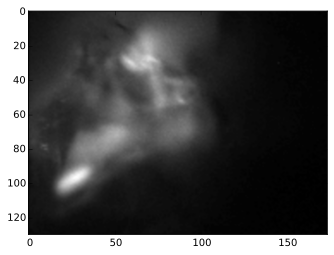

In [28]:
imshow(imgs[10000],cmap = cm.gray)

In [32]:
thorax_frame = fly.get_pkl_data('basis_fits.cpkl')

In [35]:
A = thorax_frame['A']

In [36]:
img = np.array(imgs[10000])

In [53]:
os.listdir(gd.muscle_anatomy_dir)

['max_imgs.h5py',
 'volumetric_model.hdf5',
 'registration',
 'ad_hoc_masks',
 'confocal_outline_model.cpkl',
 '65G06',
 'flatened_model.hdf5']

In [54]:
import muscle_model as mm
confocal_model = mm.GeometricModel(filepath = gd.muscle_anatomy_dir + 'confocal_outline_model.cpkl')
confocal_view = mm.ModelViewMPL(confocal_model)
import cv2
import cPickle
pkname = fly.fly_path + '/basis_fits.cpkl'
fly_frame = mm.Frame();fly_frame.load(pkname)

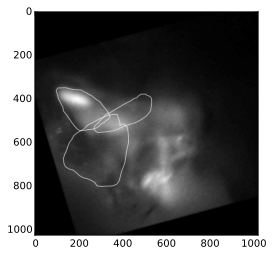

In [76]:
s = 1
A = confocal_model.frame.get_transform(fly_frame)
Ap = np.dot([[s,0.0,0],[0,s,0],[0,0,1]],A)
output_shape = (np.array([1024,1024])*s).astype(int) #confocal shape scale
output_shape = (output_shape[0],output_shape[1])
X_warped = cv2.warpAffine(img.T,Ap[:-1,:],output_shape)
imshow(X_warped,cmap = cm.gray)
contour_kwargs = {'b3':{'edgecolor': 'w', 'linewidth': 1.0, 'facecolor': 'none','alpha':0.5},
                  'b1':{'edgecolor': 'w', 'linewidth': 1.0, 'facecolor': 'none','alpha':0.5},
                  'b2':{'edgecolor': 'w', 'linewidth': 1.0, 'facecolor': 'none','alpha':0.5}}
confocal_view.plot(confocal_model.frame,contour_kwargs = contour_kwargs)

array([[  9.53585674, -93.20654755],
       [ 63.01547692,   4.60454746],
       [  0.        ,   0.        ]])

In [45]:
?cv2.warpAffine